In [1]:
from eopy.image import Loader, Image
from eopy.processing import enhance
from eopy.tools import visualise

import matplotlib.pyplot as plt
import numpy as np

## Contrast Enhancement

In [2]:
image = Loader().load('test.tif')

linear_stretch = enhance.linear_stretch(image, std=2)

bcet = enhance.bcet(image, clip=0.05)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


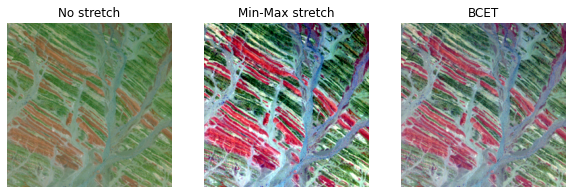

In [3]:
f, axes = plt.subplots(1, 3, figsize=(10, 10))

for im, ax, title in zip([image, linear_stretch, bcet], axes, ['No stretch', 'Min-Max stretch', 'BCET']):
    
    ax.set_title(title)
    ax.imshow(im.pixels)
    ax.axis('off')

## Pansharpening

Pansharpening functions take a coarse resolution multispectral image and fuse it with a fine resolution image
of the same area which is usually from a panchromatic band.

In [4]:
from eopy.processing import pansharpening

In [5]:
pan = Loader().load('pan.tif')

In [6]:
pansharpened = pansharpening.sfim(msi=image, pan=pan, filter_size=2)

/Users/Barney/axelspace/py37/lib/python3.7/site-packages/skimage/filters/rank/generic.py:183: UserWarning: Bad rank filter performance is expected due to a large number of bins (19371), equivalent to an approximate bitdepth of 14.2.
  out_dtype)


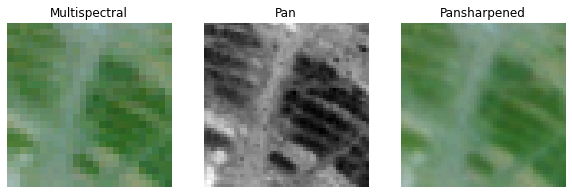

In [7]:
f, axes = plt.subplots(1, 3, figsize=(10, 10))

for im, ax, title in zip([image[100:125, 100:125], pan[200:250, 200:250], pansharpened[200:250, 200:250]], axes, ['Multispectral', 'Pan', 'Pansharpened']):
    
    ax.set_title(title)
    ax.imshow(im.pixels, cmap='gray')
    ax.axis('off')